##### <h1 style="color:Green;">Week 3 Lecture Source Code</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_n1rKmuN1fnPN-HWJTYn4zPI4bsTCCEGI8HsmDpRSkc/edit#slide=id.g11b032e97d3_0_0">[Week 3 Lecture Link Here]</a>

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr

What is Linear Regression?

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant.
- The slope of this line does not depend on the values of the other variables.
- The effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

<h2 style="color:Green;">Simple Linear Regression (pg. 8)</h2>

Let's generate some random data.

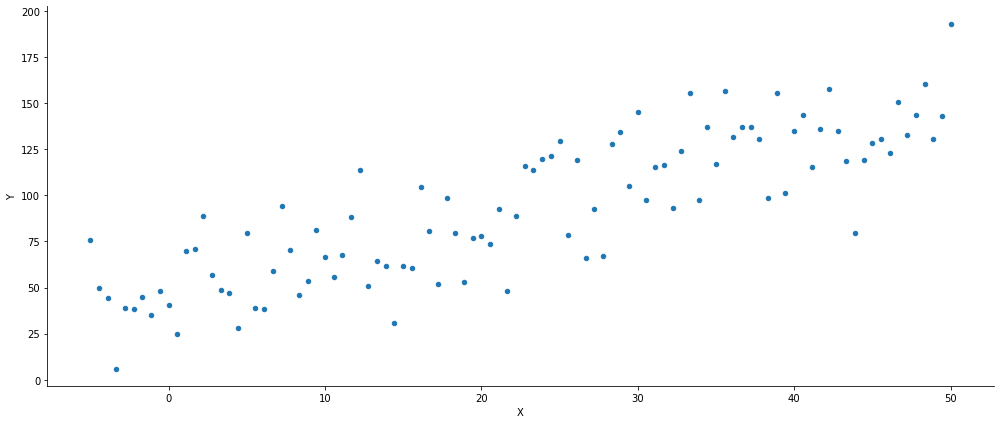

In [19]:
np.random.seed(3)
X = np.linspace(-5, 50, 100)
y = 50 + 2 * X + np.random.normal(0, 20, size=len(X))
data = pd.DataFrame({'X': X, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()

plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y_{t} = \beta_0 + \beta_1 X_1 + \epsilon_{t}$$

$\epsilon_{t}$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

<b> Estimate a simple linear regression with sklearn </b>

In [20]:
from sklearn.linear_model import LinearRegression
skmodel = LinearRegression()

#fit regression model
reg = skmodel.fit(X.reshape(-1, 1), y)

#get estimated intercepts and coefficients
print('intercept: ', reg.intercept_)
print('coefficients: ', reg.coef_)

intercept:  46.61980512076698
coefficients:  [2.0536646]


<b> Get model summary with statsmodels </b>

In [4]:
X = sm.add_constant(data['X'])
statsmodel = sm.OLS(data['Y'], X).fit()
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     235.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           8.75e-28
Time:                        20:47:20   Log-Likelihood:                -447.59
No. Observations:                 100   AIC:                             899.2
Df Residuals:                      98   BIC:                             904.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6198      3.701     12.598      0.0

<b>Display model & residuals<b/>

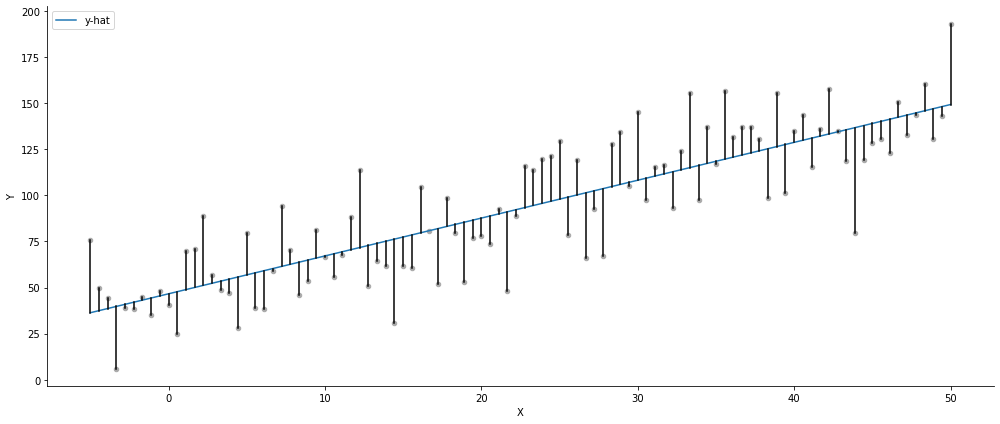

In [6]:
data['y-hat'] = statsmodel.predict()
data['residuals'] = statsmodel.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

<h2 style="color:Green;">Multiple Linear Regression (pg. 31)</h2>

Let's generate some random data.

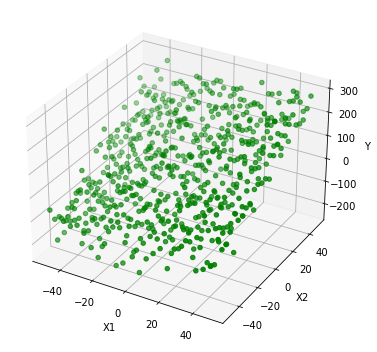

In [7]:
np.random.seed(3)
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
three_dee.set_xlabel("X1")
three_dee.set_ylabel("X2")
three_dee.set_zlabel("Y")

sns.despine()
plt.tight_layout();

For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

<b> Estimate a multiple linear regression with sklearn </b>

In [8]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [9]:
skmodel = LinearRegression()

#fit regression model
reg = skmodel.fit(X, y)

#get estimated intercepts and coefficients
print('intercept: ', reg.intercept_)
print('coefficients: ', reg.coef_)

intercept:  51.05330755502459
coefficients:  [1.06431721 3.04737559]


<b> Get model summary with statsmodels </b>

In [10]:
X_ols = sm.add_constant(X)
statsmodel = sm.OLS(y, X_ols).fit()
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1136.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          2.17e-208
Time:                        16:21:39   Log-Likelihood:                -3341.1
No. Observations:                 625   AIC:                             6688.
Df Residuals:                     622   BIC:                             6701.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0533      2.035     25.092      0.0

<b>Display model & residuals<b/>

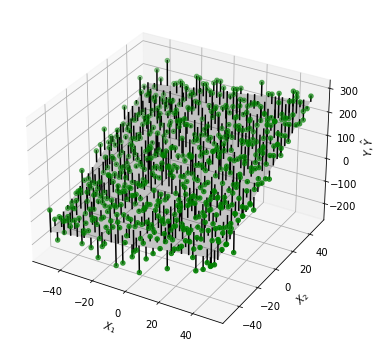

In [11]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = statsmodel.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

<h2 style="color:Green;">Predict Returns with Linear Regression (pg. 34)</h2>

Let's propose the returns of a set of ETFs and some economic indicators to engineer the features in our data. We start by specifying the ticker symbols, start date, and end date. 

In [2]:
SECTOR_ETF_SYMBOLS = ['SPY', 'XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLI','IYC', 'TLT','GLD', 'SLV', 'USO', 'SGG', 'DBC'] # Enter the sector ETF ticker symbols here
OTHER_ETF_SYMBOLS = ['FXI','EWH','BKF','EEM']
ECON_SYMBOLS = ['VIXCLS', 'BAMLH0A0HYM2', 'T10YIE']
START_DATE = '2018-01-25' # Stock data start date 
END_DATE = '2022-05-31' # Stock data end date 

In [3]:
# getting ETF price data
etfPxList = pdr.DataReader(SECTOR_ETF_SYMBOLS + OTHER_ETF_SYMBOLS, 'yahoo', START_DATE, END_DATE )['Adj Close'] # retreiving asset price data from yahoo finance
# finding log returns of ETF prices
etfLogRetList = np.log(etfPxList).diff()

Notice that for the economic indicators, we only concern about their values as opposed to their log returns. That's why we did not take the log return of the values.

In [4]:
# getting economic indicator data
econIndexList = pdr.DataReader(ECON_SYMBOLS, 'fred', START_DATE, END_DATE )
# variable names
ECON_NAMES = ['volatiliity_index', 'option_adjusted_spread', 'inflation_rate']
econIndexList.columns = ECON_NAMES

We merge the two ETF and economic data into one dataframe, then drop their NaN values.

In [5]:
DATA = pd.concat([etfLogRetList, econIndexList], axis=1).dropna()

The first thing is to standardize the dataframe we just compiled because so the features have different units of measure for instance, XLK is measured in terms of log-return and volatility index is measured in its own index unit. We scale them so that they can be compared with the same units.

In [6]:
LABEL = 'SPY' # response variable
FEATURES = (SECTOR_ETF_SYMBOLS + OTHER_ETF_SYMBOLS + ECON_NAMES)[1:] # explanatory variables

In [7]:
DATA.loc[:, FEATURES] = scale(DATA.loc[:, FEATURES]) # standardizing indicators

Displaying the data structure, data types, and variable columns of the entire data set.

In [8]:
DATA.info() # show data info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1086 entries, 2018-01-26 to 2022-05-31
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SPY                     1086 non-null   float64
 1   XLV                     1086 non-null   float64
 2   XLU                     1086 non-null   float64
 3   XLP                     1086 non-null   float64
 4   XLB                     1086 non-null   float64
 5   XLF                     1086 non-null   float64
 6   XLE                     1086 non-null   float64
 7   XLRE                    1086 non-null   float64
 8   XLK                     1086 non-null   float64
 9   XLY                     1086 non-null   float64
 10  XLI                     1086 non-null   float64
 11  IYC                     1086 non-null   float64
 12  TLT                     1086 non-null   float64
 13  GLD                     1086 non-null   float64
 14  SLV                   

<b>Splitting Data into Testing and Training Sets</b>

Splitting data into 80% training set and 20% testing set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, LABEL], test_size=0.2, random_state=0)

<b>Feature Importance</b>

Drop any insignificant features based on the feature importance scores, using Random Forest Regressor.

In [10]:
from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

Ranking features by thier relative importance scores.

Text(0.5, 0, 'Relative Importance')

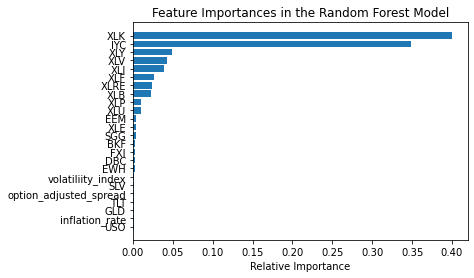

In [11]:
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

Let's keep the features with importance scores of at least 0.05. These will be XLK and IYC log returns. Then, we drop the remaining features with less significant scores. 

In [12]:
FEATURES_TO_DROP=[FEATURES[i] for i in indices[importances[indices] < 0.05]]

In [13]:
DATA = DATA.drop(columns=FEATURES_TO_DROP) # drop feature in the original data set
X_train = X_train.drop(columns = FEATURES_TO_DROP) # drop feature in the training data set
X_test = X_test.drop(columns= FEATURES_TO_DROP) # drop feature in the testing data set
FEATURES = [f for f in FEATURES if f not in FEATURES_TO_DROP] 

In [14]:
FEATURES

['XLK', 'IYC']

We have now reduced the number of features in our model from 24 to 2.

<b>Multicollinearity</b>

We use VIF to test for multicollinearity, and found that XLK and IYC log returns have VIFs equal to 4.15, hence showing moderate correlations. Since they are not considered to have high correlations. We will keep them as our ultimate predictors for SPY log return.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(DATA.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]
VIF_table = pd.DataFrame({'Features': FEATURES, 'VIF': VIF})
VIF_table

,Features,VIF
0,XLK,4.415161
1,IYC,4.415161


<b>Multiple Linear Regression</b>

<i> Visualizing 3D scatterplot before model fitting </i>

Text(0.5, 0.92, 'XLK vs IYC vs SPY log returns')

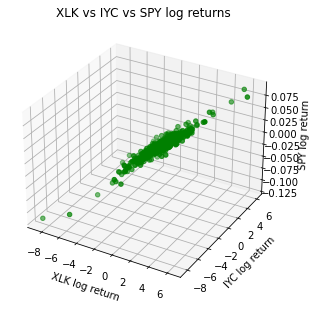

In [16]:
## Plot scatterplot before model fitting
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(DATA.XLK, DATA.IYC, DATA.SPY, c='g')
three_dee.set_xlabel("XLK log return")
three_dee.set_ylabel("IYC log return")
three_dee.set_zlabel("SPY log return")
three_dee.set_title('XLK vs IYC vs SPY log returns')

Our model has two independent variables, so its regression formula looks something like this:

$y$ = $\beta_0$ + $\beta_1$ * (XLK log return) + $\beta_2$ * (IYC log return) + $\epsilon$
<br><br>
We will get the model summary with statsmodels and estimate a multiple linear regression with sklearn.

<i> Estimate a multiple linear regression with sklearn </i>

In [21]:
linear_model = LinearRegression()

#fit regression model
linear_model = linear_model.fit(X_train, y_train)

#get estimated intercepts and coefficients
print('intercept: ', linear_model.intercept_)
print('coefficients: ', linear_model.coef_)

intercept:  0.00046209079131740035
coefficients:  [0.0070365  0.00652658]


In [22]:
X_ols = sm.add_constant(X_train)
statsmodel = sm.OLS(y_train, X_ols).fit()
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     6285.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:54:06   Log-Likelihood:                 3693.4
No. Observations:                 868   AIC:                            -7381.
Df Residuals:                     865   BIC:                            -7367.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      3.957      0.0

<i> Visualizing 3D scatterplot after model fitting (not shown because code is too complex)</i>

We would now evaluate the goodness of fit of the model with some metrics from the sklearn package. Notice that the Adjusted $R^2$ computed from sklearn is different from that produced by statsmodel OLS result summary, but is overall accurate.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print('The Adjusted R-squared is: ', 1-(1-r2)*(DATA.shape[0]-1)/(DATA.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae)
print('The RMSE is: ', rmse)

The Adjusted R-squared is:  0.94709759443623
The MAE is:  0.0022329851307687784
The RMSE is:  0.0030802212521658257


<b>Ridge Regression</b>

We need to tune the regularization parameter, $\lambda$. To do this, we use the grid search method to test a set of $\lambda$ values. Here, we allow the machine to select the value set for us. We may also pre-specify a set of values, for example, from 0.0001 to 10000, but may run the risk of overfitting.
Here, the RidgeCV function finds the optimal $\lambda$ that maximizes the $R^2$ using 5-Fold cross validation. The will be the estimate for our cost function.<br>

In [24]:
from sklearn.linear_model import RidgeCV
# initiate the 5-Fold cross validation 
ridge_model = RidgeCV(cv=5, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(X_train, y_train)
print('The lambda is:', ridge_model.alpha_)

The lambda is: 10.0


In [25]:
# calculating model metrics
y_test_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_ridge)*(DATA.shape[0]-1)/(DATA.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_ridge)
print('The RMSE is: ', rmse_ridge)

The Adjusted R-squared is:  0.9473285346890578
The MAE is:  0.0022233668531586935
The RMSE is:  0.003073490697144547


Compared to the multiple linear regression model without regularization, ridge regression yields higher Adjusted $R^2$, and lower MAE and RMSE. <br>
Let's look at the results from lasso regression before concluding our best model!

<b>Lasso Regression</b>

Here, the LassoCV function finds the optimal $\lambda$ using a 5-Fold cross validation.

In [26]:
from sklearn.linear_model import LassoCV
# initiate 5-Fold cross validation 
lasso_model = LassoCV(cv=5) # uses scoring='r2'by default
# fit the model with the best alpha
lasso_model = lasso_model.fit(X_train, y_train)
print('The lambda is:', lasso_model.alpha_)

The lambda is: 2.552015251545731e-05


In [27]:
# calculating model metrics
y_test_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_lasso)*(DATA.shape[0]-1)/(DATA.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_lasso)
print('The RMSE is: ', rmse_lasso)

The Adjusted R-squared is:  0.9471912829500007
The MAE is:  0.0022298146725605217
The RMSE is:  0.003077492555535373


Compared to the original multiple linear regression and lasso regression models, ridge regression yields the highest Adjusted $R^2$, and the lowest MAE and RMSE, hence, being the best model of choice.<br><br>
Based on the estimated intercept and coeffieients, this lasso prediction model is defiend as:<br>
$\hat{y}$ = 0.00046208323425874794 + 0.00696725 * (XLK log return) + 0.0065121 * (IYC log return)

In [28]:
print('intercept:', ridge_model.intercept_)
print('coefficient:', ridge_model.coef_)

intercept: 0.0004620793110324128
coefficient: [0.00696727 0.00651208]


<b>Logistic Regression</b>

We can also transform this into a classification problem. We just have to convert the SPY log return into binary values such that 0 represents a day with negative return and 1 represents a day with positive return. So the problem now becomes using the XLK and IYC log returns to predict SPY log return.

In [29]:
# converting SPY log returns into binary values 1's and 0's
DATA.SPY = (DATA.SPY > 0).astype(int)
y_test = (y_test > 0).astype(int)
y_train = (y_train > 0).astype(int)

In [30]:
DATA.head()

,SPY,XLK,IYC
2018-01-26,1,0.860019,0.585592
2018-01-29,0,-0.564313,0.036841
2018-01-30,0,-0.560729,-0.499923
2018-01-31,1,0.387492,-0.325033
2018-02-01,0,0.009532,-0.742419


We investigate whether there is a label imbalance issue. We count the number of days that SPY yields positive and negative log returns, then plotted them using a barplot.
The minority-to-majority ratio of SPY directions matches about a 1:1.26 ratio or 55.8% samples in the majority class and about 44.2% samples in the minority class. This is a well-balanced data set since the minority-to-majority ratio is close to 1:1. Hence, we do not need to rebalance the labels!!

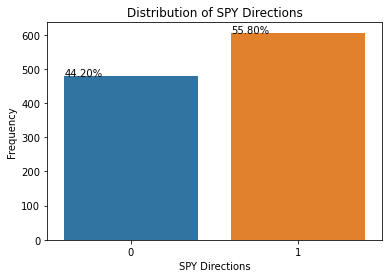

In [31]:
ax = sns.countplot(x = "SPY", data = DATA)
plt.title('Distribution of SPY Directions')
plt.xlabel('SPY Directions')
plt.ylabel('Frequency')
total = len(DATA["SPY"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

Now, we start fitting the logistic regression model on SPY directions.

In [62]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)
lr_probs = logistic_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
y_test_pred_logistic = logistic_model.predict(X_test) # predict the class labels using predict function for the test dataset

Let's produce the confusion matrix.

Text(0.5, 1.0, 'Confusion Matrix')

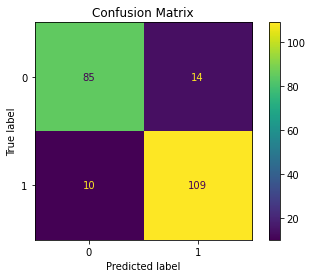

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_model, X_test, y_test)
plt.title("Confusion Matrix")

Let's produce the metrics like precision, recall, and F1 score.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_logistic))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        99
           1       0.89      0.92      0.90       119

    accuracy                           0.89       218
   macro avg       0.89      0.89      0.89       218
weighted avg       0.89      0.89      0.89       218



Let's compute the testing accuracy.

In [43]:
print('training accuracy score:', logistic_model.score(X_train,y_train))
print('testing accuracy score:', logistic_model.score(X_test,y_test))

training accuracy score: 0.8974654377880185
testing accuracy score: 0.8899082568807339


Let's plot the ROC curve.

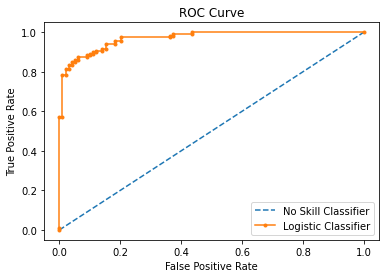

In [63]:
from sklearn.metrics import roc_curve
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Let's find the AUC score.

In [64]:
from sklearn.metrics import roc_auc_score
# calculate roc-auc scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

No Skill Classifier: ROC AUC=0.500
Logistic Classifier: ROC AUC=0.970


Sklearn has a cross_val_score object that allows us to see how well our model generalizes. 10-Fold cross validation is used to tune logistic regression parameters and minimize its cost function result.

In [66]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(LogisticRegression(), DATA.loc[:, FEATURES], DATA.loc[:, LABEL], scoring='accuracy', cv=10)
cross_val = pd.Series(cross_val)
print("The range of our accuracy scores range from ", cross_val.min(), " to ", cross_val.max())
print("The average of our accuracy score is ", cross_val.mean())

The range of our accuracy scores range from  0.8148148148148148  to  0.963302752293578
The average of our accuracy score is  0.8949711179068978
